In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [305]:
x_train = pd.read_csv('datasets/bike_train.csv')
x_test = pd.read_csv('datasets/bike_test.csv')

In [306]:
x_train[430:]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
430,2011-01-19 23:00:00,1,0,1,1,12.30,13.635,52,31.0009,1,27,28
431,2011-02-01 00:00:00,1,0,1,2,6.56,9.090,64,7.0015,2,6,8
432,2011-02-01 01:00:00,1,0,1,2,6.56,9.090,69,7.0015,0,3,3
433,2011-02-01 02:00:00,1,0,1,2,6.56,11.365,69,0.0000,0,2,2
434,2011-02-01 03:00:00,1,0,1,2,6.56,11.365,69,0.0000,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [307]:
x_test.windspeed.value_counts()

0.0000     867
11.0014    638
8.9981     618
12.9980    615
7.0015     583
6.0032     553
15.0013    552
16.9979    471
19.0012    372
19.9995    316
22.0028    230
23.9994    186
26.0027    146
27.9993    109
30.0026     65
31.0009     57
32.9975     32
35.0008     26
36.9974     17
39.0007     17
40.9973     12
43.9989      3
54.0020      2
46.0022      2
43.0006      2
55.9986      1
50.0021      1
Name: windspeed, dtype: int64

In [308]:
sub = pd.read_csv('datasets/sampleSubmission.csv')

In [309]:
sub

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [310]:
x_train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


- 타겟 데이터 분리

### 전처리
- datetime 타입변환 및 파생변수 생성 / 컬럼 삭제
- casual + registered = count 이므로 casual, registered 칼럼 삭제
- 타겟 데이터 분리

In [311]:
y_train = x_train['count']
x_train = x_train.drop(columns=['count', 'registered', 'casual'])

In [312]:
# datetime 처리
x_train['datetime'] = pd.to_datetime(x_train['datetime'])
x_test['datetime'] = pd.to_datetime(x_test['datetime'])

In [313]:
x_train['year'] = x_train['datetime'].apply(lambda x : x.year)
x_train['month'] = x_train['datetime'].apply(lambda x : x.month)
x_train['hour'] = x_train['datetime'].apply(lambda x : x.hour)

x_test['year'] = x_test['datetime'].apply(lambda x : x.year)
x_test['month'] = x_test['datetime'].apply(lambda x : x.month)
x_test['hour'] = x_test['datetime'].apply(lambda x : x.hour)

In [314]:
x_train = x_train.drop(columns='datetime')
x_test = x_test.drop(columns='datetime')
x_test.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0


In [315]:
x_train.day = x_train.day % 10
x_test.day = x_test.day % 10

AttributeError: 'DataFrame' object has no attribute 'day'

- 이상치 탐색

<AxesSubplot:>

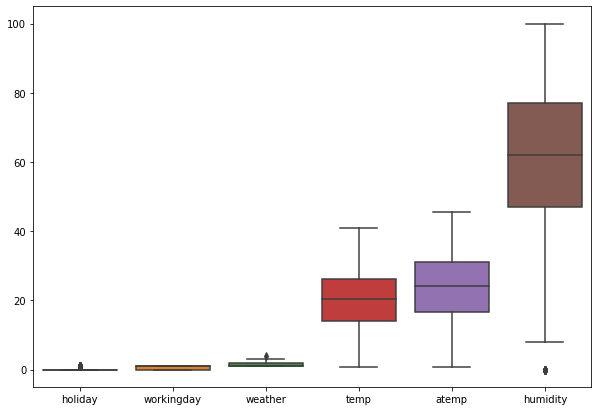

In [317]:
plt.figure(figsize=(10,7))
sns.boxplot(data = x_train.iloc[:,1:7]) # humidity와 windspeed 이상치 처리

In [318]:
x_train.workingday = np.int8(x_train.workingday == 0)
x_train['holiday'] = x_train.workingday + x_train.holiday
x_train[x_train.holiday == 2] = 1
x_train.pop('workingday')

0        1
1        1
2        1
3        1
4        1
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: workingday, Length: 10886, dtype: int8

In [319]:
x_test.workingday = np.int8(x_test.workingday == 0)
x_test['holiday'] = x_test.workingday + x_test.holiday
x_test[x_test.holiday == 2] = 1
x_test.pop('workingday')

0       0
1       0
2       0
3       0
4       0
       ..
6488    0
6489    0
6490    0
6491    0
6492    0
Name: workingday, Length: 6493, dtype: int8

In [320]:
x_train.holiday.value_counts()

0    7412
1    3474
Name: holiday, dtype: int64

In [321]:
x_test.holiday.value_counts()

0    4453
1    2040
Name: holiday, dtype: int64

In [322]:
#x_train['humidity'] = x_train[x_train.humidity < 26]

In [323]:
#x_train['windspeed'] = x_train[x_train.windspeed != 0]

In [324]:
x= x_train['humidity']
q1 = x.quantile(.25)
q3 = x.quantile(.75)
iqr = q3-q1
x_train['humidity'] = x[(x >= q1-1.5*iqr)&(x<= q3+1.5*iqr)]
x_train['humidity'] = x_train['humidity'].fillna(x_train['humidity'].min()) # 이상치가 q1아래 존재하므로 min으로 채움

x= x_train['windspeed']
q1 = x.quantile(.25)
q3 = x.quantile(.75)
iqr = q3-q1
x_train['windspeed'] = x[(x >= q1-1.5*iqr)&(x<= q3+1.5*iqr)]
x_train['windspeed'] = x_train['windspeed'].fillna(x_train['windspeed'].max()) # 이상치가 q3 위에 존재하므로 max로 채움

x_train

,season,holiday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,1,1,1,9.84,14.395,81,0.0000,2011,1,0
1,1,1,1,9.02,13.635,80,0.0000,2011,1,1
2,1,1,1,9.02,13.635,80,0.0000,2011,1,2
3,1,1,1,9.84,14.395,75,0.0000,2011,1,3
4,1,1,1,9.84,14.395,75,0.0000,2011,1,4
...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,15.58,19.695,50,26.0027,2012,12,19
10882,4,0,1,14.76,17.425,57,15.0013,2012,12,20
10883,4,0,1,13.94,15.910,61,15.0013,2012,12,21
10884,4,0,1,13.94,17.425,61,6.0032,2012,12,22


In [325]:
x_train.corr()

,season,holiday,weather,temp,atemp,humidity,windspeed,year,month,hour
season,1.000000,-0.054808,0.034689,0.313458,0.321433,0.264010,-0.077000,0.221841,0.972437,0.049161
holiday,-0.054808,1.000000,-0.059952,-0.124981,-0.125196,-0.108604,-0.078654,-0.250492,-0.062748,-0.065145
weather,0.034689,-0.059952,1.000000,-0.007637,-0.004380,0.412651,0.030459,0.110824,0.041338,-0.002335
temp,0.313458,-0.124981,-0.007637,1.000000,0.986632,0.122787,0.087136,0.386368,0.324486,0.226706
atemp,0.321433,-0.125196,-0.004380,0.986632,1.000000,0.153145,0.058666,0.413388,0.333907,0.227633
humidity,0.264010,-0.108604,0.412651,0.122787,0.153145,1.000000,-0.156647,0.470524,0.292247,-0.122136
windspeed,-0.077000,-0.078654,0.030459,0.087136,0.058666,-0.156647,1.000000,0.244541,-0.069227,0.196153
year,0.221841,-0.250492,0.110824,0.386368,0.413388,0.470524,0.244541,1.000000,0.262100,0.249504
month,0.972437,-0.062748,0.041338,0.324486,0.333907,0.292247,-0.069227,0.262100,1.000000,0.058998
hour,0.049161,-0.065145,-0.002335,0.226706,0.227633,-0.122136,0.196153,0.249504,0.058998,1.000000


<AxesSubplot:>

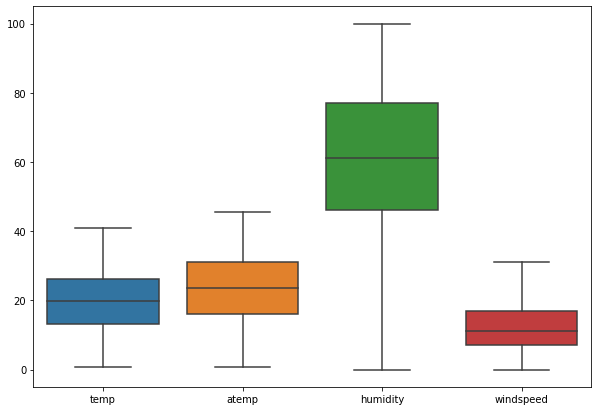

In [326]:
plt.figure(figsize=(10,7))
sns.boxplot(data = x_train[['temp', 'atemp','humidity','windspeed']])

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>]], dtype=object)

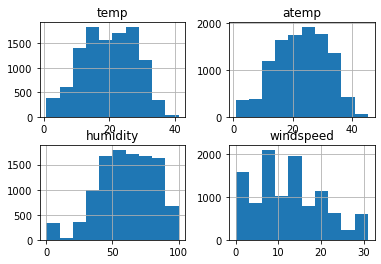

In [327]:
x_train[['temp', 'atemp','humidity','windspeed']].hist()

- 스케일링

In [328]:
from sklearn.preprocessing import RobustScaler
rbst = RobustScaler()
x_train[['temp', 'atemp','humidity','windspeed']] = rbst.fit_transform(x_train[['temp', 'atemp','humidity','windspeed']])

In [329]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train[['temp', 'atemp','humidity','windspeed']] = mms.fit_transform(x_train[['temp', 'atemp','humidity','windspeed']])

In [330]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train[['temp', 'atemp','humidity','windspeed']] = ss.fit_transform(x_train[['temp', 'atemp','humidity','windspeed']])

In [331]:
x_train.head(3)

,season,holiday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,1,1,1,-1.186610,-0.943691,0.967935,-1.551937,2011,1,0
1,1,1,1,-1.285483,-1.026891,0.921532,-1.551937,2011,1,1
2,1,1,1,-1.285483,-1.026891,0.921532,-1.551937,2011,1,2


In [332]:
#로버스트
x_test[['temp', 'atemp','humidity','windspeed']] = rbst.transform(x_test[['temp', 'atemp','humidity','windspeed']])

In [333]:
#민맥스
x_test[['temp', 'atemp','humidity','windspeed']] = mms.transform(x_test[['temp', 'atemp','humidity','windspeed']])

In [334]:
#스탠다드
x_test[['temp', 'atemp','humidity','windspeed']] = ss.transform(x_test[['temp', 'atemp','humidity','windspeed']])

- 유의 피처 추출

- RMSLE 평가지표 함수 생성

In [335]:
def rmsle(y, pred):
    logY = np.log1p(y)
    logPred = np.log1p(pred)
    sq_error = (logY - logPred)**2
    rmsle = np.sqrt(np.mean(sq_error))
    return rmsle

- 훈련 테스트 분할

In [336]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_train, y_train, test_size=0.2, random_state=999)

In [337]:
#검증
rf_grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=999, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [4, 5, 6, 10],
                          'n_estimators': [50, 100, 200, 500]}])

In [338]:
pred = rf_grid.best_estimator_.predict(Xtest)
print('RMSE :', np.sqrt(mean_squared_error(Ytest, pred)))
print('RMSLE :', rmsle(Ytest, pred))

RMSE : 53.80845607775781
RMSLE : 0.43837759268765064


In [339]:
1트
RMSE : 47.89517126589583
RMSLE : 0.3586766758201079

SyntaxError: invalid syntax (<ipython-input-339-6d28dc2dba19>, line 1)

In [ ]:
2트
RMSE : 54.155366632510976
RMSLE : 0.43774798234538476

In [ ]:
RMSE : 53.653861633683825
RMSLE : 0.43740048554114425

In [ ]:
RMSE : 53.73690326137429
RMSLE : 0.4384885891833433

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

In [ ]:
kfold = KFold(n_splits = 5, shuffle=True, random_state=999)

In [ ]:
rf = RandomForestRegressor(random_state=42) #렌포
rf_parameters = [{'n_estimators':[50,100,200,500], 'max_depth' : [4,5,6,10]}]
rf_grid = GridSearchCV(rf, param_grid = rf_parameters, cv=kfold, n_jobs = -1)

In [119]:
xgb = XGBRegressor(random_state=999) #xgb
xgb_parameters = {'n_estimators':[50,100,200], 'max_depth' : [5,6,10], 'learning_rate' : [0.01, 0.1, 0.2]}
xgb_grid = GridSearchCV(xgb, param_grid = xgb_parameters, cv=3, n_jobs = -1)

In [120]:
lgb = LGBMRegressor(random_state=999) #lgbm
lgb_parameters = {'n_estimators':[50,100,200], 'max_depth' : [5,6,10], 'learning_rate' : [0.01, 0.1, 0.2]}
lgb_grid = GridSearchCV(lgb, param_grid = lgb_parameters, cv=3, n_jobs = -1)

In [188]:
gbr = GradientBoostingRegressor(random_state=999)
gbr_parameters = {'n_estimators':[50,100,200,500], 'max_depth' : [5,6,10], 'learning_rate' : [0.01, 0.1, 0.2]}
gbr_grid = GridSearchCV(gbr, param_grid = gbr_parameters, cv=3, n_jobs = -1)

for model in [rf_grid, xgb_grid, lgb_grid, gbr_grid]:
    model.fit(Xtrain, Ytrain)
    pred = model.best_estimator_.predict(Xtest)
    print('RMSE :', np.sqrt(mean_squared_error(Ytest, pred)))
    print('RMSLE :', rmsle(Ytest, pred))

In [194]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 2021 to 481
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   8708 non-null   object 
 1   season     8708 non-null   int64  
 2   holiday    8708 non-null   int64  
 3   weather    8708 non-null   int64  
 4   temp       8708 non-null   float64
 5   atemp      8708 non-null   float64
 6   humidity   8708 non-null   float64
 7   windspeed  8708 non-null   float64
 8   year       8708 non-null   int64  
 9   month      8708 non-null   int64  
 10  day        8708 non-null   int64  
 11  hour       8708 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 884.4+ KB


In [ ]:
#검증
rf_grid.fit(Xtrain, Ytrain)
pred = model.best_estimator_.predict(Xtest)
print('RMSE :', np.sqrt(mean_squared_error(Ytest, pred)))
print('RMSLE :', rmsle(Ytest, pred))

In [340]:
Xtest

,season,holiday,weather,temp,atemp,humidity,windspeed,year,month,hour
10155,4,0,1,-0.197876,-0.114424,-1.955474,1.970325,2012,11,13
8796,3,0,1,1.285224,1.295603,0.271885,-0.671161,2012,8,21
1018,1,1,2,-1.285483,-1.441251,1.849599,1.719156,2011,3,22
10860,4,0,1,-0.692243,-0.695185,-0.516971,-1.551937,2012,12,22
7500,2,0,1,0.593110,0.798043,-1.491441,-0.671161,2012,5,21
...,...,...,...,...,...,...,...,...,...,...
3617,3,0,1,1.186350,1.129749,-0.424165,-0.419992,2011,9,15
664,1,0,1,-1.779850,-1.441251,-0.981005,-1.551937,2011,2,22
4737,4,0,2,-0.099003,-0.031771,0.318289,1.719156,2011,11,11
1883,2,0,1,-0.099003,-0.031771,-0.748988,0.838380,2011,5,9


In [341]:
x_test

,season,holiday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,1,0,1,-1.087736,-1.275397,-0.192148,1.719156,2011,1,0
1,1,0,1,-1.087736,-1.026891,-0.192148,-1.551937,2011,1,1
2,1,0,1,-1.087736,-1.026891,-0.192148,-1.551937,2011,1,2
3,1,0,1,-1.087736,-1.109544,-0.192148,-0.167981,2011,1,3
4,1,0,1,-1.087736,-1.109544,-0.192148,-0.167981,2011,1,4
...,...,...,...,...,...,...,...,...,...,...
6488,1,0,2,-1.087736,-1.109544,-0.006535,-0.167981,2012,12,19
6489,1,0,2,-1.087736,-1.109544,-0.006535,-0.167981,2012,12,20
6490,1,0,1,-1.087736,-1.109544,-0.006535,-0.167981,2012,12,21
6491,1,0,1,-1.087736,-1.026891,-0.192148,-0.419992,2012,12,22


- xgb lgb, gbr 사용법이 익숙치 않아 계속 오류가 난다. 성능도 나쁘다.

In [342]:
rf_grid.fit(x_train, y_train) # 검증 후 원 훈련세트로 훈련

GridSearchCV(cv=KFold(n_splits=5, random_state=999, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [4, 5, 6, 10],
                          'n_estimators': [50, 100, 200, 500]}])

In [343]:
rf_grid.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [344]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

In [345]:
sub['count'] = rf_grid.best_estimator_.predict(x_test)

In [346]:
#sub['count'] = np.expm1(sub['count'])

In [347]:
ver=5
sub.to_csv("ver_{0}_bike_submission.csv".format(ver), index=False)

1. ohe 없이 = 0.50794
2. ohe 후 = 0.95965
3. 유의변수 x_train[['workingday', 'temp', 'atemp', 'year', 'month', 'hour']] = 0.51733
4. 유의피쳐 추출 없이 원 데이터로 진행 = 0.50157
5. 원 데이터 fit 후 회귀예측 = 0.49805
6. 0.48543
7. 0.49814
8. minmax = 0.50162
9. std = 0.49815
11. 0.50031